
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Dataset**: No-show appointments.<br />
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.<br />
**About the dataset**:
It gives informations about:<br />
-PatientId , <br />
-AppointmentID,<br />
-Gender of the patient, <br />
-ScheduledDay: which tells us on what day the patient set up for their appointment, <br />
-Appointment Day  <br />
-Age, <br />
-Neighborhood:which indicates the location of the hospital,<br />
-Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program which provided financial aid to poor Brazilian families.<br />
And to describe the situation of the patient it gives information on whether or not the patient is diagnosed by:<br />
-Hipertension<br />
-Diabetes,<br />
-Alcoholism <br />
-Handcap;  ,<br />
-SMS_received: Whether or not the patient received an SMS.<br />
-No-show: which indicates either if the patient show up or not for their appointment.


### Question(s) for Analysis
>**What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?:**
<br />
      **-Does having or not a scholarship represents an important factor for patients to attend their appointments? .** <br />
      **-Does receiving an SMS help patient to remember the appointment day?**  <br />
      **-Does being diagnosed with a chronic disease determine if the patient will show up for their scheduled appointment or not?**  <br />
      **-Should the location of the hospital be an important factor to take into account in the prediction step?**  <br />

In [1]:
# the packages needed 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#upgrade tensorflow version to upgrade pandas: it was mentionned when first I tried to upgrade it directly. 
!pip install --upgrade tensorflow-tensorboard  

Requirement already up-to-date: tensorflow-tensorboard in c:\users\lenovo\anaconda3\lib\site-packages (1.5.1)


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#in the first time doing this after upgrading pandas you have to restart the kernel.
!pip install --upgrade pandas==0.25.0

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\lenovo\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\lenovo\\AppData\\Local\\Temp\\pip-install-a_qepk2q\\pandas\\setup.py'"'"'; __file__='"'"'C:\\Users\\lenovo\\AppData\\Local\\Temp\\pip-install-a_qepk2q\\pandas\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\lenovo\AppData\Local\Temp\pip-wheel-wlm1iblm'
       cwd: C:\Users\lenovo\AppData\Local\Temp\pip-install-a_qepk2q\pandas\
  Complete output (907 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\testing.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\_typing.py -> build\lib


  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3
    Running setup.py install for pandas: started
    Running setup.py install for pandas: still running...
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\lenovo\anaconda3\lib\site-packages\pandas-1.1.3.dist-info\
   from C:\Users\lenovo\anaconda3\Lib\site-packages\~andas-1.1.3.dist-info
  Moving to c:\users\lenovo\anaconda3\lib\site-packages\pandas\
   from C:\Users\lenovo\anaconda3\Lib\site-packages\~andas


  creating build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\api.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\base.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\cast.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\common.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\concat.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\dtypes.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\generic.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\inference.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\missing.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  copying pandas\core\dtypes\__init__.py -> build\lib.win-amd64-3.8\pandas\core\dtypes
  creating build\lib.win-amd64-3.8\pandas\core\groupby
  copying pandas\core\groupby\base.py -> 

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we  will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


In [4]:
# Load the data  and take a look of it 
#df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df = pd.read_csv("C:/Users/lenovo/Desktop/udacity alx scholarship/noshowappointments-kagglev2-may-2016.csv")
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [5]:
# dataset column's name
df.columns 

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

**The dataset contains 110527 rows and 14 columns**

In [6]:
#shape of the data
df.shape  

(110527, 14)

In [7]:
#exploring the data 
df.info()        # there is no missing values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**From the description below, we can conclude  that the majority of the patient does not have a scholarship, and the age varied between -1 and 115 years. we will discuss this point int the cleaning step. The 'Handcap' column has 4 as a maximum value, instead of 0 or 1 to determine whether the patient is diagnosed by it. <br />**


In [9]:
df[df['Handcap']== 4].shape #there is 3 lines with this value.

(3, 14)

In [10]:
# searching the duplicate values
df.duplicated().sum()

0

In [11]:
df.nunique() #110527 Appointments Id are the key of our table.

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
#types of the column's values
df.dtypes  

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

- We will fix the type of certain column in the next step.


### Data Cleaning

**This dataset does not contain missing values nor having duplicated values, Let's discuss the other points.**
- The type of certain columns
- The Age column
- The  Handcap rows with '4' as a value
- The Time 2 column added


We will need time in analysis.

In [13]:
#creatning a new column Time to use it after in the exploratory analysis:
df[['ScheduledDay','Time']] = df.ScheduledDay.str.split("T", expand=True)
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z


In [14]:
df['ApointmentDay']=df.AppointmentDay.astype('datetime64[ns]') # convert AppointmentDay column from object to date type 
df['ScheduledDay']=df.ScheduledDay.astype('datetime64[ns]') # convert ScheduleDay column from object to date type 

In [15]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay            object
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
Time                      object
ApointmentDay     datetime64[ns]
dtype: object

**We will add a new column that contains the name of days of the week, in order to use it after in Exploratory analysis**

In [16]:
#df['day']= df['ScheduledDay'].dt.weekday_name
df['day']= df['ScheduledDay'].dt.strftime("%A")
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time,ApointmentDay,day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z,2016-04-29,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z,2016-04-29,Friday


<AxesSubplot:>

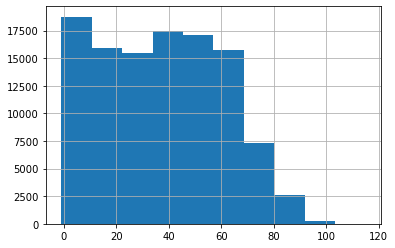

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#As seeing before, the age column appears to has a lot of errors 
df['Age'].hist()   

- Plus than 17500 values that contain 0 as age, it seems like conclusion made with this column will not help us to came up with good conclusion, we will drop this column

In [18]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['Age'], axis=1, inplace=True)

In [19]:
#As the AppointmentID is the key of this table we can drop PatientId, 
#we'll drop this column too as its presence doesn't give a plus to our conclusions
df.drop(['PatientId'], axis=1, inplace=True)

In [20]:
err=df[df['Handcap'] == 4].index
err

Int64Index([91820, 98538, 104268], dtype='int64')

In [21]:
df=df.drop(err)

In [22]:
df.shape

(110524, 15)

In [23]:
df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Time',
       'ApointmentDay', 'day'],
      dtype='object')

**After the cleaning step, our dataset now, contains 110524 rows and 14 columns.**

In [24]:
df.drop(['AppointmentDay'], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

##  Research Question: ## 
**What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?** 

In [25]:
def hist_plot_by(x, xlabel, ylabel,title):
#A function to draw a histogram #
     ax = plt.subplot(1,1,1)
     ax.hist(x)
     ax.set_xlabel(xlabel)
     ax.set_ylabel(ylabel)
     ax.set_title(title)
plt.show()

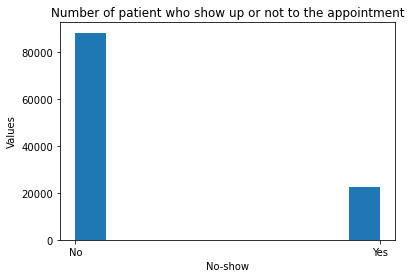

In [26]:
#plotting histogram of 'No-show' column
hist_plot_by(df['No-show'], 'No-show','Values','Number of patient who show up or not to the appointment')

- The majority of patients show up to their appointments.

> **N.B: No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.**

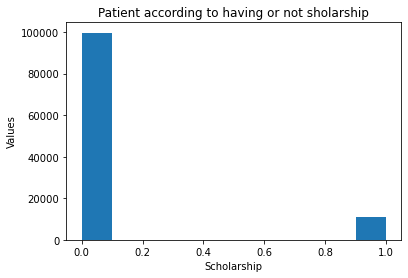

In [27]:
#histogramm
hist_plot_by(df['Scholarship'], 'Scholarship','Values','Patient according to having or not sholarship')

The majority of patients don't have a scholarship, maybe studying the relation between the scholarship and showing up to the appointments will not give us meaning.However, let's study more this.

> **-Studying the relation  between scholarship and showing up to the appointments:**

In [28]:
#counting the number of patient who has or not a scholarship
df.groupby('Scholarship')['AppointmentID'].count()

Scholarship
0    99663
1    10861
Name: AppointmentID, dtype: int64

>99663 patients don't have a scholarship and 10861 patients do have it.

We will create masks in order to calculate proportions.

In [29]:
#patient who hasn't a scholarship and do not attend appointments 
df1 = df[(df['Scholarship'] == 0) & (df['No-show'] == 'Yes')].AppointmentID.count()
#patient who hasn't a scholarship and do attend appointments 
df2 = df[(df['Scholarship'] == 0) & (df['No-show'] == 'No')].AppointmentID.count()
#patient who has scholarship and attend the appointment
df3 = df[(df['Scholarship'] == 1) & (df['No-show'] == 'No')].AppointmentID.count()
df4 = df[(df['Scholarship'] == 1) & (df['No-show'] == 'Yes')].AppointmentID.count()

In [30]:
#function to calculate the proportion:
def proportion(prop):
    total=df.AppointmentID.count()
    proportions=[]
    for i in range(len(prop)):
        proportions.append(prop[i]/total)
    return(proportions)

>Plotting the results: relation between scholarship and No-show 

- NS: No sholarship
- DNS: do not show to the appointments
- S: With scholarship
- Sh:Show

In [31]:
#function to plot visuals: this function will be used in the sections below
def bar_plot_by(x,y, xlabel, ylabel,title,label):
#A function to draw a histgram #
     ax = plt.subplot(1,1,1)
     plt.bar(x,y,label=label)
     plt.xlabel(xlabel)
     plt.ylabel(ylabel)
     plt.title(title)
     plt.legend()
plt.show()

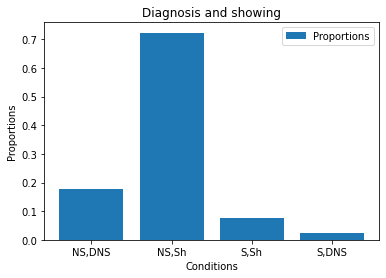

In [34]:
bar_plot_by(["NS,DNS", "NS,Sh","S,Sh","S,DNS"], proportion([df1,df2,df3,df4]),'Conditions',
           'Proportions',"Diagnosis and showing","Proportions")

**- From the graph, we can conclude that for the patient who has scholarship, the majority of them came to the appointment.Even though the higher percentage of attendance is for those who don't have a scholarship. (>70%)**

> **- The relation between being diagnosed and showing up to the appointments:** 

In order to study this relation, we will study two cases: 
- One general: with a diag table which contains patients diagnosed with Hipertension, or diabets, or Alcoholism or Handicap to take a general look and differ btween patients who has already being diagnosed and who's not.
- The other one will take into account every specific diagnosis.

In [35]:
#Creating a diag table: which contains patients diagnosed with Hipertension, or diabets, or Alcoholism or Handicap;
diag=df[(df['Diabetes'] == 1) | (df['Alcoholism'] == '1') | (df['Handcap'] == '1') | (df['Hipertension'] == '1')]
diag.head()

,AppointmentID,Gender,ScheduledDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time,ApointmentDay,day
4,5642494,F,2016-04-29,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z,2016-04-29,Friday
36,5637975,F,2016-04-29,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,07:35:19Z,2016-04-29,Friday
37,5637986,F,2016-04-29,TABUAZEIRO,1,1,1,0,0,0,No,07:35:56Z,2016-04-29,Friday
41,5633339,F,2016-04-28,MARUÍPE,0,0,1,0,0,0,No,09:20:36Z,2016-04-29,Thursday
44,5635414,F,2016-04-28,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,13:27:27Z,2016-04-29,Thursday


In [36]:
diag.shape

(7943, 14)

In [37]:
##Creating a nodiag table: which contains patients without any preliminary diagnosis 
nodiag=df[(df['Diabetes'] == 0) & (df['Alcoholism'] == 0) & (df['Handcap'] == 0) & (df['Hipertension'] == 0)]

In [38]:
#creating masks based on diag table:
noshow_diag=diag[diag['No-show']== "Yes"].AppointmentID.count()#did not attend
yes_diag=diag[diag['No-show']== "No"].AppointmentID.count() #attend 
#creating masks for nodiag table
noshow=nodiag[nodiag['No-show']== "Yes"].AppointmentID.count() #did not attend
yes=nodiag[nodiag['No-show']== "No"].AppointmentID.count()  #did attend

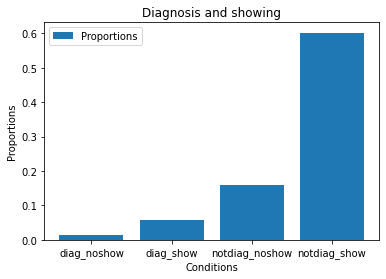

In [39]:
bar_plot_by(["diag_noshow","diag_show", "notdiag_noshow","notdiag_show"], proportion([noshow_diag,yes_diag,noshow,yes]),'Conditions',
           'Proportions',"Diagnosis and showing" ,"Proportions")

> It appears that this general study doens't help us to make a specific conclusions between the two categories of patient.
Let's move to the specific case.

In [40]:
#creating masks for patients showing up to their appointments according to their diagnosis.
diab=df[(df['Diabetes']== 1) & (df['No-show']== "No")].AppointmentID.count() #diab and show
Alco=df[(df['Alcoholism']== 1) & (df['No-show']== "No")].AppointmentID.count() #alcoholism and show
Hiper=df[(df['Hipertension']== 1) & (df['No-show']== "No")].AppointmentID.count() #having hipertension and show
Handc=df[(df['Handcap']== 1) & (df['No-show']== "No")].AppointmentID.count() #Handicap and show

In [41]:
#creating masks for patients  who don't show up to their appointments according to their diagnosis.
diab0=df[(df['Diabetes']== 1) & (df['No-show']== "Yes")].AppointmentID.count() #diab and doesn't show
Alco0=df[(df['Alcoholism']== 1) & (df['No-show']== "Yes")].AppointmentID.count() #alcoholism and doesn't show
Hiper0=df[(df['Hipertension']== 1) & (df['No-show']== "Yes")].AppointmentID.count() #hipertension and doesn't show
Handc0=df[(df['Handcap']== 1) & (df['No-show']== "Yes")].AppointmentID.count() #Handcap and doesn't show

<ipython-input-31-f92ecf03dd03>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,1,1)


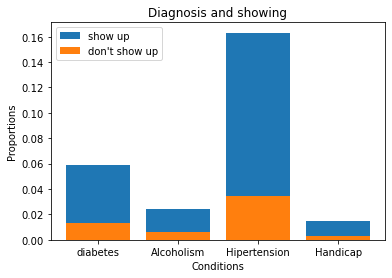

In [42]:
bar_plot_by(["diabetes","Alcoholism", "Hipertension","Handicap"], proportion([diab,Alco,Hiper,Handc]),'Conditions',
           'Proportions',"Diagnosis and showing", "show up" )
bar_plot_by(["diabetes","Alcoholism", "Hipertension","Handicap"], proportion([diab0,Alco0,Hiper0,Handc0]),'Conditions',
           'Proportions',"Diagnosis and showing","don't show up" )

 **There is a relationship or correlation between being diagnosisted and showing to the apointment**

> **- We can conclude that the majority of patient diagonised show up to their appointments, the class with higher amount of showing up to the appointment is the 'Hipertension' column. Its clear now that the diagnosis or the type of the diagnosis of the patient is an important factor to take into account to predict the response.**

 -**The relation between recieving a SMS and showing up to the appointments**

In [43]:
#creating masks
sms=df[(df['SMS_received']== 0) & (df['No-show'] == 'Yes')].AppointmentID.count() # No SMS and not showing up
sms1=df[(df['SMS_received']== 0) & (df['No-show'] == 'No')].AppointmentID.count() #No SMS and  showing up
sms0=df[(df['SMS_received']== 1) & (df['No-show'] == 'Yes')].AppointmentID.count() # receiving SMS and not showing up
sms01=df[(df['SMS_received']== 1) & (df['No-show'] == 'No')].AppointmentID.count() # receiving SMS and  showing up

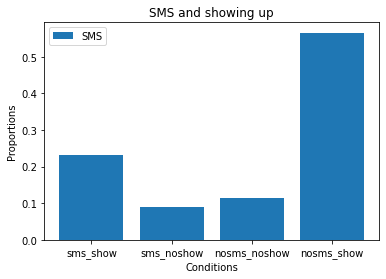

In [44]:
bar_plot_by(["sms_show","sms_noshow", "nosms_noshow","nosms_show"], proportion([sms01,sms0,sms,sms1]),'Conditions',
           'Proportions',"SMS and showing up", "SMS" )

>- There is no relation between recieving an sms and attending the appointment. 

>- **Let's see now the relation between the gender of the patient and showing up to the appointments.**

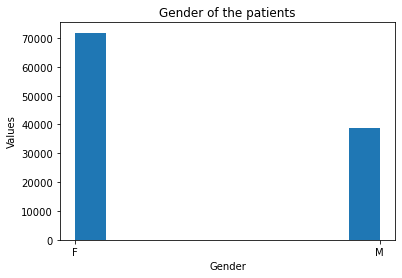

In [45]:
hist_plot_by(df['Gender'], 'Gender','Values','Gender of the patients')

>The dataset contains patient women more than men, so the relation between showing up or not to the appointments will be made by the type of the gender.

In [46]:
df[df['Gender']== "M"].count()  # There are exactly 38685 men patient in the dataset 

AppointmentID    38685
Gender           38685
ScheduledDay     38685
Neighbourhood    38685
Scholarship      38685
Hipertension     38685
Diabetes         38685
Alcoholism       38685
Handcap          38685
SMS_received     38685
No-show          38685
Time             38685
ApointmentDay    38685
day              38685
dtype: int64

In [47]:
df[df['Gender']== "F"].count()  # There are exactly 71839 women patient in the dataset.

AppointmentID    71839
Gender           71839
ScheduledDay     71839
Neighbourhood    71839
Scholarship      71839
Hipertension     71839
Diabetes         71839
Alcoholism       71839
Handcap          71839
SMS_received     71839
No-show          71839
Time             71839
ApointmentDay    71839
day              71839
dtype: int64

In [48]:
# proportions calculation will be made depending on the gender of the patient 
f_ds=df[(df['Gender']== "F") & (df['No-show'] == "Yes")].AppointmentID.count()/71839 #Women who don't show
f_s=df[(df['Gender']== "F") & (df['No-show'] == "No")].AppointmentID.count()/71839  #Women who show up
m_ds=df[(df['Gender']== "M") & (df['No-show'] == "Yes")].AppointmentID.count()/38685 #Men who don't show
m_s=df[(df['Gender']== "M") & (df['No-show'] == "No")].AppointmentID.count()/38685  # Men who show up

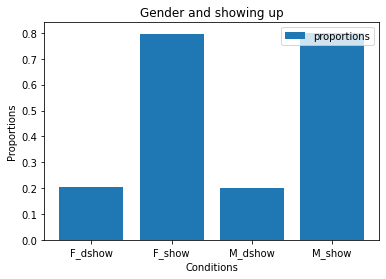

In [49]:
bar_plot_by(["F_dshow","F_show", "M_dshow","M_show"], [f_ds,f_s,m_ds,m_s],'Conditions',
           'Proportions',"Gender and showing up", "proportions" )

>**- We can notice that the probability of a women and men  to attend their appointments is very high (approximatively 80%).The Gender type  can also be an important factor to take into account.**

**- Let's discuss now the relation between Days and showing up to the appointments.**


In [50]:
week=df[df['No-show']=="No"]
week0=df[df['No-show']=="Yes"]
wk_s=week.groupby('No-show')['day'].value_counts() #who show up
wk_d=week0.groupby('No-show')['day'].value_counts() #who don't show up
wk_s

No-show  day      
No       Tuesday      20877
         Wednesday    19381
         Monday       18524
         Friday       15028
         Thursday     14373
         Saturday        23
Name: day, dtype: int64

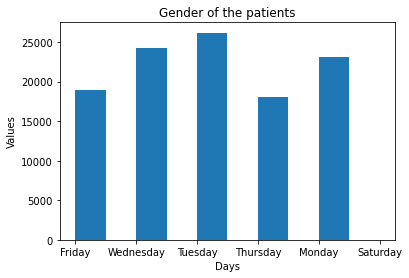

In [51]:
hist_plot_by(df['day'], 'Days','Values','Gender of the patients')

In [52]:
w_s = []
[w_s.append(value) for value in wk_s.values] #show up
w_d = []
[w_d.append(value) for value in wk_d.values] # don'tshow up 

[None, None, None, None, None, None]

<ipython-input-31-f92ecf03dd03>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,1,1)


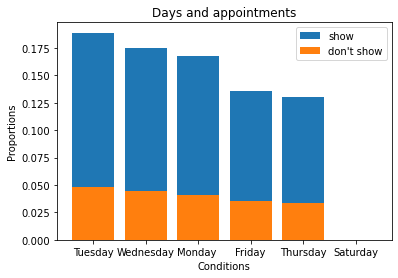

In [53]:
bar_plot_by(["Tuesday", "Wednesday","Monday ","Friday","Thursday","Saturday"], proportion(w_s),'Conditions',
           'Proportions',"Days and appointments", "show" )
bar_plot_by(["Tuesday", "Wednesday","Monday ","Friday","Thursday","Saturday"], proportion(w_d),'Conditions',
           'Proportions',"Days and appointments", "don't show" )

The graph can gave us information about the day when the patients show up the most to the hospital, which is Tuesday.

> **- Now let's see the relation between showing to an appointment and the Neighbourhood.**

In [54]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [55]:
#creating a table with all information about those who didn't show up...
N=df[df['No-show']=="Yes"]
N.Neighbourhood.nunique()

80

In [56]:
Yes=df[df['No-show']=="No"]
Yes.Neighbourhood.nunique()

80

In [57]:
df.Neighbourhood.nunique()

81

Text(0, 0.5, 'Number of patients')

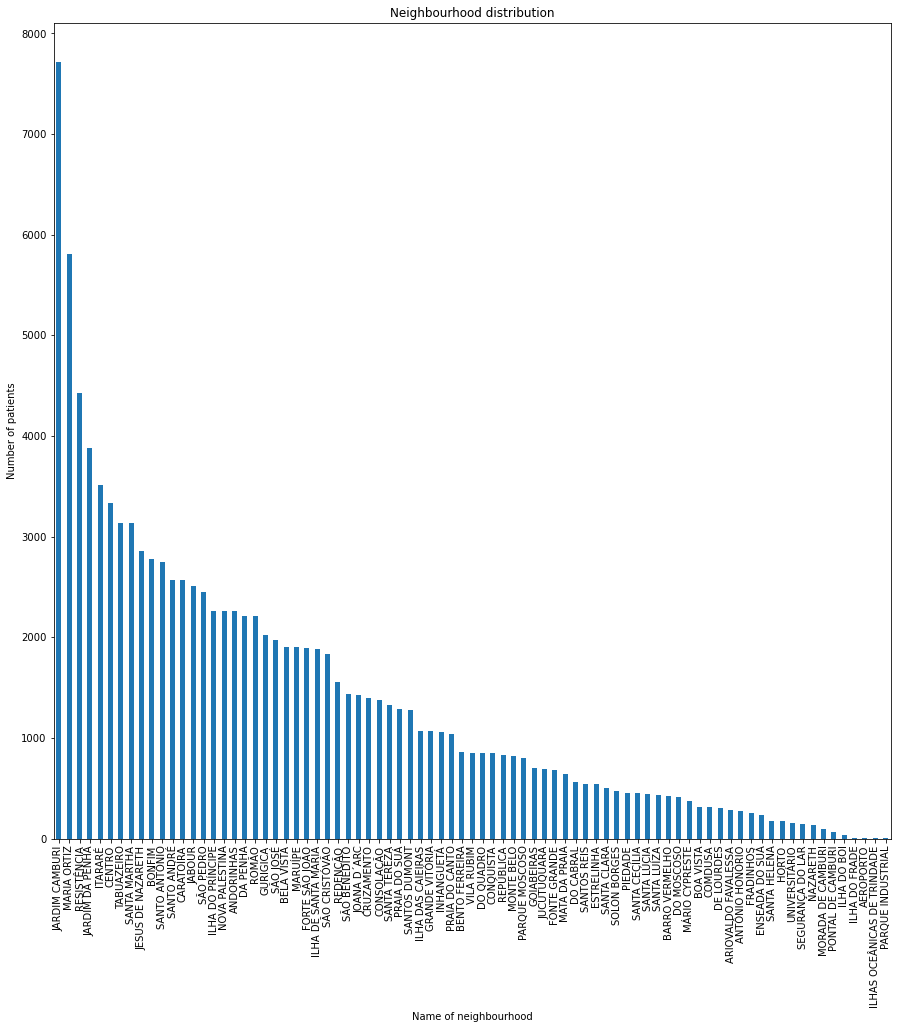

In [60]:
df.Neighbourhood.value_counts().plot(kind='bar', figsize=(15,15))
plt.title('Neighbourhood distribution')
plt.xlabel('Name of neighbourhood')
plt.ylabel('Number of patients')

>- **From the visualization above, we can see that the number of patients for certain Neighbourhood is high. so it can be a factor to take into account in the prediction step** 

 **The relation between time and showing up to the cheduled appointment**

In [61]:
df['ti']= df['Time'].apply(lambda x:x.split(":")[0])
df.head()

,AppointmentID,Gender,ScheduledDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time,ApointmentDay,day,ti
0,5642903,F,2016-04-29,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z,2016-04-29,Friday,18
1,5642503,M,2016-04-29,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z,2016-04-29,Friday,16
2,5642549,F,2016-04-29,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04Z,2016-04-29,Friday,16
3,5642828,F,2016-04-29,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31Z,2016-04-29,Friday,17
4,5642494,F,2016-04-29,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z,2016-04-29,Friday,16


In [62]:
week=df[df['No-show']=="No"]
week0=df[df['No-show']=="Yes"]
time_s=week.groupby('No-show')['ti'].value_counts() # show up to the appointment
time_d=week0.groupby('No-show')['ti'].value_counts() # don't show to it

In [63]:
x = np.arange(6,22)
y_d = []
[y_d.append(value) for value in time_d.values] #don't show up 
y_s = []
[y_s.append(value) for value in time_s.values] #show up
y_s

[16302,
 12545,
 10297,
 8616,
 7145,
 7057,
 6534,
 6204,
 4318,
 4225,
 2187,
 1275,
 1055,
 374,
 70,
 2]

<ipython-input-31-f92ecf03dd03>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,1,1)


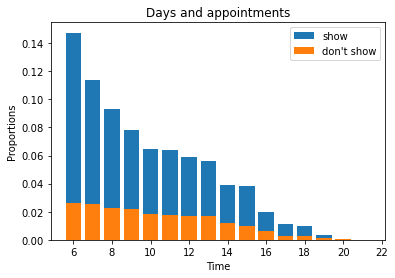

In [64]:
bar_plot_by(x, proportion(y_s),'Time',
           'Proportions',"Days and appointments", "show" )
bar_plot_by(x, proportion(y_d),'Time',
           'Proportions',"Days and appointments", "don't show" )

> **It appears that there is a a relation between the time fixed and showing up to the appointment. The high presence of the scheduled appointments is at 6 am.**

<a id='conclusions'></a>
## Conclusions

>  At the end of the analysis, we conclude that in order to predict if a patient will show up for their scheduled appointment or not, we have to take into account three important factors:

- 1- Whether or not the patient has been diagnosed or not, and the type of it. (The hypertension category took the higher percentage) 


- 2- The gender of the patient.


- 3- The time and the day picked.


- 4- The neighbourhood

## Limitations
> **The study could be deeper if we take other factors that could impact the presence of the patient to the scheduled appointments: Like the age of the patient,  other disease records, and the schedule work of the patient.** 